In [1]:
# import libraries for this job
import numpy as np                     
import pandas as pd                     
import matplotlib.pyplot as plt                             
import seaborn as sns                        


#### o---> Import and read in the csv file

In [15]:
# import weather data from dev_space folder
weather = pd.read_csv('../dev_space/weather_7.csv')
weather.shape

(39063, 8)

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   39063 non-null  int64  
 1   Date-Time (CDT)     39063 non-null  object 
 2   Temperature   (°F)  39058 non-null  float64
 3   RH   (%)            39058 non-null  float64
 4   Dew Point   (°F)    39058 non-null  float64
 5   Host Connected      4 non-null      object 
 6   Stopped             1 non-null      object 
 7   End of File         1 non-null      object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.4+ MB


In [17]:
weather.isna().sum()

#                         0
Date-Time (CDT)           0
Temperature   (°F)        5
RH   (%)                  5
Dew Point   (°F)          5
Host Connected        39059
Stopped               39062
End of File           39062
dtype: int64

In [18]:
weather.columns

Index(['#', 'Date-Time (CDT)', 'Temperature   (°F)', 'RH   (%)',
       'Dew Point   (°F)', 'Host Connected', 'Stopped', 'End of File'],
      dtype='object')

#### o----> Drop NA data using columns of interest

In [20]:
df_clean = weather.dropna(subset=['Temperature   (°F)', 'RH   (%)','Dew Point   (°F)'])
df_clean.shape

(39058, 8)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39058 entries, 0 to 39061
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   39058 non-null  int64  
 1   Date-Time (CDT)     39058 non-null  object 
 2   Temperature   (°F)  39058 non-null  float64
 3   RH   (%)            39058 non-null  float64
 4   Dew Point   (°F)    39058 non-null  float64
 5   Host Connected      0 non-null      object 
 6   Stopped             0 non-null      object 
 7   End of File         0 non-null      object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


In [22]:
df_clean.columns

Index(['#', 'Date-Time (CDT)', 'Temperature   (°F)', 'RH   (%)',
       'Dew Point   (°F)', 'Host Connected', 'Stopped', 'End of File'],
      dtype='object')

#### o---> Drop Columns 

In [28]:
df_drop = df_clean.drop(['#','Date-Time (CDT)','Host Connected', 'Stopped', 'End of File'], axis=1)
df_drop.head()

,Temperature (°F),RH (%),Dew Point (°F)
0,75.78,22.96,35.34
1,74.03,24.02,35.01
2,72.86,24.31,34.32
3,72.23,24.91,34.40
4,71.80,25.18,34.30


#### o---> Rename columns 

In [29]:
df_rename = df_drop.rename(columns={'Temperature   (°F)': 'temperature',
                                    'RH   (%)': 'humidity',
                                    'Dew Point   (°F)': 'dew_point'
                                    })

df_rename.columns

Index(['temperature', 'humidity', 'dew_point'], dtype='object')

In [30]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39058 entries, 0 to 39061
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  39058 non-null  float64
 1   humidity     39058 non-null  float64
 2   dew_point    39058 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [31]:
df_rename.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,39058.0,79.833534,4.446776,68.18,76.86,80.28,82.7600,95.38
humidity,39058.0,57.380377,10.159571,22.96,50.94,57.93,65.4200,83.86
dew_point,39058.0,63.071436,7.703064,33.94,58.40,63.45,69.0475,80.54


#### o----> Plot and Visualize the data

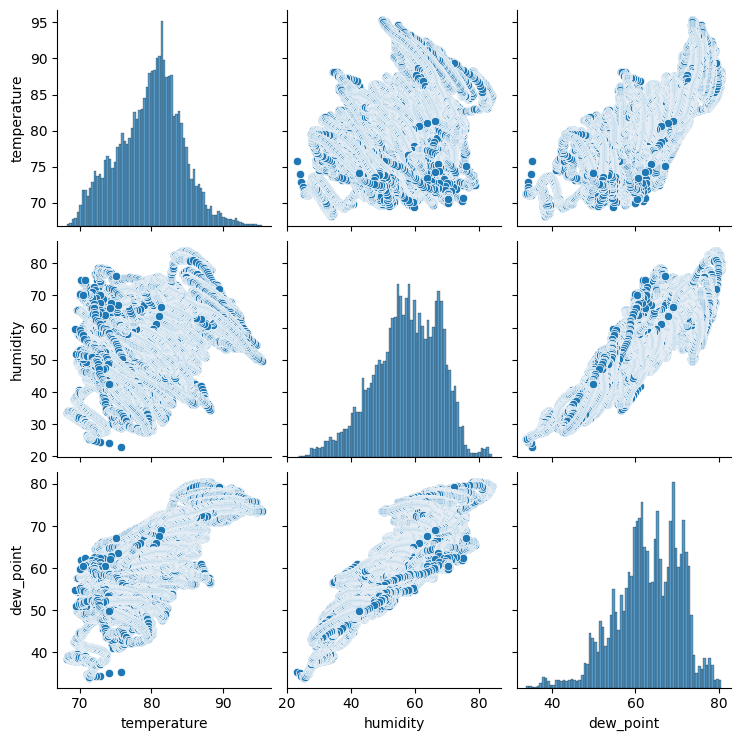

In [32]:
sns.pairplot(df_rename)
plt.show()

<Axes: ylabel='Density'>

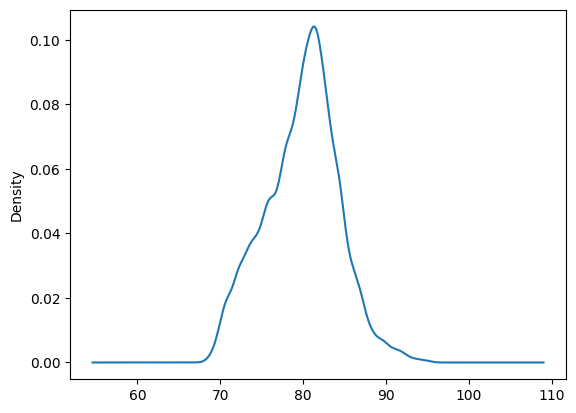

In [ ]:
df_rename['temperature'].plot(kind='density')
plt.show()

<Axes: ylabel='Density'>

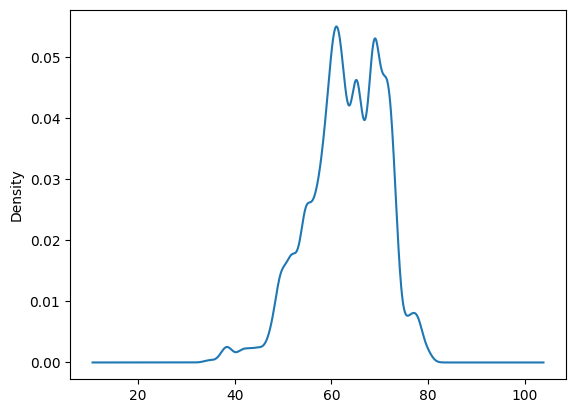

In [ ]:
df_rename['dew_point'].plot(kind='density')
plt.show()

<Axes: ylabel='Density'>

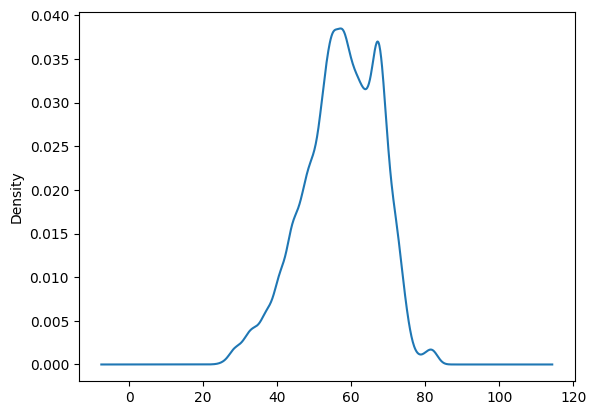

In [ ]:
df_rename['humidity'].plot(kind='density')
plt.show()

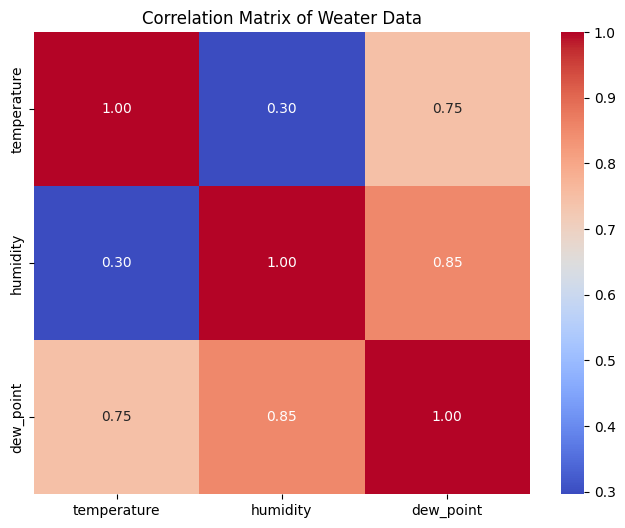

In [33]:
# do a correlation matrix and heatmap the reults
corr = df_rename.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weater Data')
plt.show()

#### o----> data with date

In [39]:
df_clean.columns

Index(['#', 'Date-Time (CDT)', 'Temperature   (°F)', 'RH   (%)',
       'Dew Point   (°F)', 'Host Connected', 'Stopped', 'End of File'],
      dtype='object')

In [54]:
df_date = df_clean.copy()
df_date['Date-Time (CDT)'] = pd.to_datetime(df_date['Date-Time (CDT)'])


df_date['month'] = df_date['Date-Time (CDT)'].dt.month_name().astype('category')
df_date['day'] = df_date['Date-Time (CDT)'].dt.day_name().astype('category')
df_date['year'] = df_date['Date-Time (CDT)'].dt.year

df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39058 entries, 0 to 39061
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   #                   39058 non-null  int64         
 1   Date-Time (CDT)     39058 non-null  datetime64[ns]
 2   Temperature   (°F)  39058 non-null  float64       
 3   RH   (%)            39058 non-null  float64       
 4   Dew Point   (°F)    39058 non-null  float64       
 5   Host Connected      0 non-null      object        
 6   Stopped             0 non-null      object        
 7   End of File         0 non-null      object        
 8   month               39058 non-null  category      
 9   day                 39058 non-null  category      
 10  year                39058 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), int64(1), object(3)
memory usage: 3.9+ MB


In [55]:
df_date_clean = df_date.rename(columns={
    'Temperature   (°F)': 'temperature',
    'RH   (%)': 'humidity',
    'Dew Point   (°F)': 'dew_point'
}).drop(columns=['#', 'Host Connected', 'Stopped', 'End of File'])

In [56]:
df_date_clean.head()

,Date-Time (CDT),temperature,humidity,dew_point,month,day,year
0,2023-05-03 14:51:44,75.78,22.96,35.34,May,Wednesday,2023
1,2023-05-03 14:56:44,74.03,24.02,35.01,May,Wednesday,2023
2,2023-05-03 15:01:44,72.86,24.31,34.32,May,Wednesday,2023
3,2023-05-03 15:06:44,72.23,24.91,34.40,May,Wednesday,2023
4,2023-05-03 15:11:44,71.80,25.18,34.30,May,Wednesday,2023


In [66]:
# group by month and year and get the mean of each month
# df_group_year = df_date_clean.groupby(['month'])[['temperature','humidity','dew_point']].mean().reset_index()
df_group_month = df_date_clean.groupby(['month'])[['temperature','humidity','dew_point']].mean().reset_index()

df_group_month.describe().T

C:\Users\Owner\AppData\Local\Temp\ipykernel_22148\2944831959.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_month = df_date_clean.groupby(['month'])[['temperature','humidity','dew_point']].mean().reset_index()


,count,mean,std,min,25%,50%,75%,max
temperature,5.0,79.598507,3.379098,74.567059,78.403585,79.733867,82.218935,83.069091
humidity,5.0,57.071112,6.063641,49.906414,53.410907,55.472862,62.138300,64.427075
dew_point,5.0,62.696433,5.816907,56.006329,59.100741,60.809435,68.712441,68.853218


In [67]:
df_group_month.head()

,month,temperature,humidity,dew_point
0,August,82.218935,64.427075,68.853218
1,July,83.069091,62.138300,68.712441
2,June,79.733867,49.906414,59.100741
3,May,74.567059,53.410907,56.006329
4,September,78.403585,55.472862,60.809435


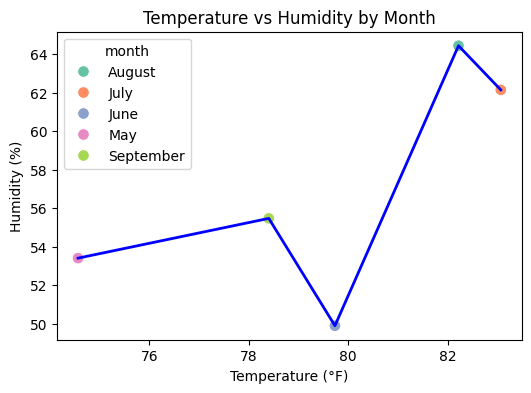

In [73]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_group_month, x='temperature', y='humidity', color='blue', lw=2)
sns.scatterplot(data=df_group_month, x='temperature', y='humidity',s=70, hue='month', palette='Set2')
plt.title('Temperature vs Humidity by Month')
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.show()

#### o---> Machine Learning 

In [78]:
# prepare the data for modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# find x and y values
X = df_date_clean[['humidity', 'dew_point']]
y = df_date_clean['temperature']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print X_train
print(X_train.shape)
print(X_test.shape)


(31246, 2)
(7812, 2)


In [79]:
# simiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create the model
model_lrg = LinearRegression()

# fint the model
model_lrg.fit(X_train, y_train)

# make predictions 
y_pred = model_lrg.predict(X_test)


In [81]:
# print the coefficients
print('Coefficients: ', model_lrg.coef_)
print('Intercept: ', model_lrg.intercept_)

Coefficients:  [-33.33103717  48.74432343]
Intercept:  68.20049210439346


In [82]:

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # predictions based on linear model
# ridge_predict = ridge_model.predict(X_test)

# metrics of analysis
mse_results = mean_squared_error(y_test, y_pred)
mae_results = mean_absolute_error(y_test, y_pred)
r2_value = r2_score(y_test,y_pred)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 0.431
mean squared error: 0.372
r-squared value: 0.981


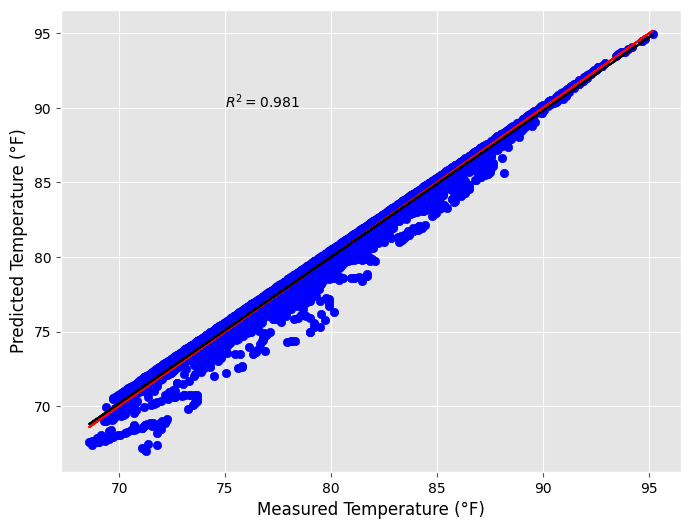

In [94]:
# plot predictions vs actual values
z = np.polyfit(y_test, y_pred,1)

plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred, color='blue') 
    plt.plot(y_test, y_test, color='red')
    plt.plot(y_test, z[0]*y_test + z[1], color='black')
    plt.xlabel('Measured Temperature (°F)', color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.ylabel('Predicted Temperature (°F)', color = 'black')
    plt.text(x=75, y=90, s=f'$R^2 ={r2_value:.3f}$', color='black')
    plt.show()
    

In [95]:
print(df_date_clean.shape)

(39058, 7)


In [109]:
## Ridge Regression Model
"""
grid search can only be used in 
models with hyper parameters. 
Adjust of alpha values, iterations and solvers

alpha: applies to models with regularization i.e ridge (L2), lasso(L1), elastic net
maximum_iterations: number of iterations before model is complete. 
Try to find the best solution — but if you can't converge by this number of steps, stop.
solver: optimization model
"""
param_grid = {
    'alpha':[0.01,0.1, 1.0, 10,100],
    'max_iter':[100,1000,7000],
    'solver':['auto', 'sag', 'saga', 'cholesky', 'lsqr']
}


In [110]:
# apply gird search infrusturcture
from sklearn.linear_model import RidgeCV, Ridge

grid_search = GridSearchCV(
    estimator = Ridge(),
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv=3, # number of folds for cross-validation
    verbose=1 # verbosity level
)

# fit the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10, 100],
                         'max_iter': [100, 1000, 7000],
                         'solver': ['auto', 'sag', 'saga', 'cholesky', 'lsqr']},
             scoring='neg_mean_squared_error', verbose=1)

In [111]:
grid_search.best_params_

{'alpha': 0.01, 'max_iter': 7000, 'solver': 'sag'}

In [112]:
# predict y using the best estimator from the grid search
ridge_tune = grid_search.best_estimator_.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # predictions based on linear model
# ridge_predict = ridge_model.predict(X_test)

# metrics of analysis
mse_results = mean_squared_error(y_test, ridge_tune)
mae_results = mean_absolute_error(y_test, ridge_tune)
r2_value = r2_score(y_test,ridge_tune)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 0.431
mean squared error: 0.372
r-squared value: 0.981


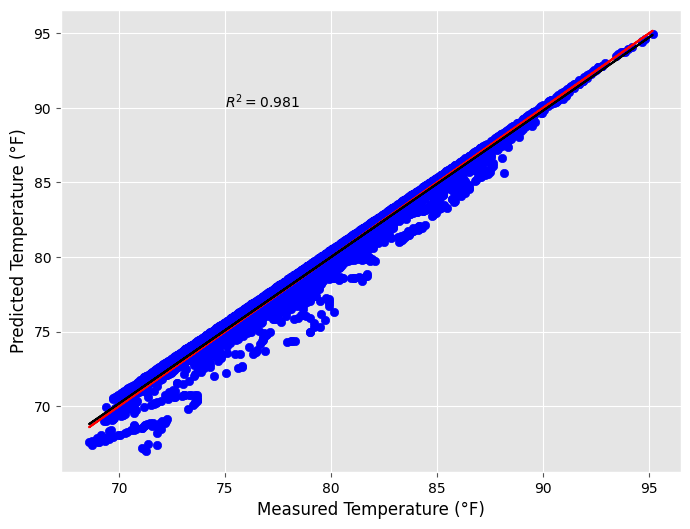

In [113]:
# plot predictions vs actual values
z = np.polyfit(y_test,  ridge_tune,1)

plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, ridge_tune, color='blue') 
    plt.plot(y_test, y_test, color='red')
    plt.plot(y_test, z[0]*y_test + z[1], color='black')
    plt.xlabel('Measured Temperature (°F)', color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.ylabel('Predicted Temperature (°F)', color = 'black')
    plt.text(x=75, y=90, s=f'$R^2 ={r2_value:.3f}$', color='black')
    plt.show()

In [119]:
## write a function 

def grade_scoring(student_score):
    if student_score > 90:
        print ('Grade A')
    elif student_score >80:
        print('Grade B')
    elif student_score >70:
        print('Grade C')
    elif student_score >60:
        print('Grade D')
    else:
        print('Student Failed')
    
        

    
    
grade_scoring(50) 

Student Failed


#### o--> Demonstrate shapely additive explanation using black box models (XGBOOST)

In [ ]:
"""
While Using XGBOOST, be careful about the best use of this black box model.
** for general regression, use reg:squarederror
** for robustness to outliers use reg:absoluteerror or reg:pseudohubererror
** for predicting probability use reg:logistic
** for count data (evernts per minute) use count:poisson
** for survival/time to event modelling use survival:cox

"""

In [120]:
####
# xgbressor_model = XGBRegressor(objective = 'reg:squarederror')
from xgboost import XGBRegressor
import shap
shap.initjs


c:\Users\Owner\juggle_ds\juggle_ds\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<function shap.plots._force.initjs()>

In [122]:
xgb_model = XGBRegressor(objective = 'reg:squarederror')
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [123]:
# make predicitons
predictions = xgb_model.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# metrics of analysis
mse_results = mean_squared_error(y_test, predictions)
mae_results = mean_absolute_error(y_test, predictions)
r2_value = r2_score(y_test, predictions)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 0.108
mean squared error: 0.026
r-squared value: 0.999


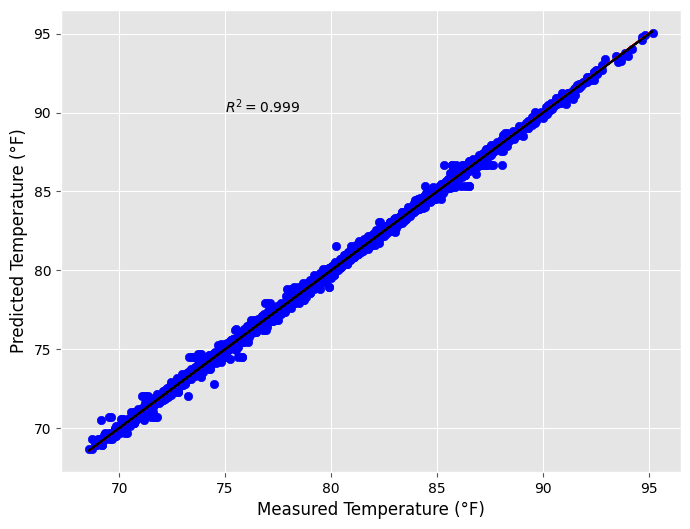

In [124]:
# plot predictions vs actual values
z = np.polyfit(y_test,  predictions,1)

plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, predictions, color='blue') 
    plt.plot(y_test, y_test, color='red')
    plt.plot(y_test, z[0]*y_test + z[1], color='black')
    plt.xlabel('Measured Temperature (°F)', color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.ylabel('Predicted Temperature (°F)', color = 'black')
    plt.text(x=75, y=90, s=f'$R^2 ={r2_value:.3f}$', color='black')
    plt.show()

In [ ]:
# use shapely to view results
# Create an explainer object
explainer = shap.Explainer(xgb_model)

# use explainer to 
shap_values = explainer(X_test)

In [128]:
np.shape(shap_values.values)

(7812, 2)

In [129]:
print(explainer)

In [130]:
print(shap_values)

.values =
array([[-2.4874127 , -6.3672824 ],
       [ 2.362919  , -1.7952323 ],
       [-0.43511727,  7.2297773 ],
       ...,
       [-1.2281783 ,  1.3452961 ],
       [ 0.03897853, -2.6007464 ],
       [-4.598941  ,  7.5727024 ]], dtype=float32)

.base_values =
array([79.84576, 79.84576, 79.84576, ..., 79.84576, 79.84576, 79.84576],
      dtype=float32)

.data =
array([[0.56453202, 0.45665236],
       [0.46387521, 0.57317597],
       [0.66732348, 0.83841202],
       ...,
       [0.67077176, 0.7027897 ],
       [0.53875205, 0.56287554],
       [0.86288998, 0.86373391]])


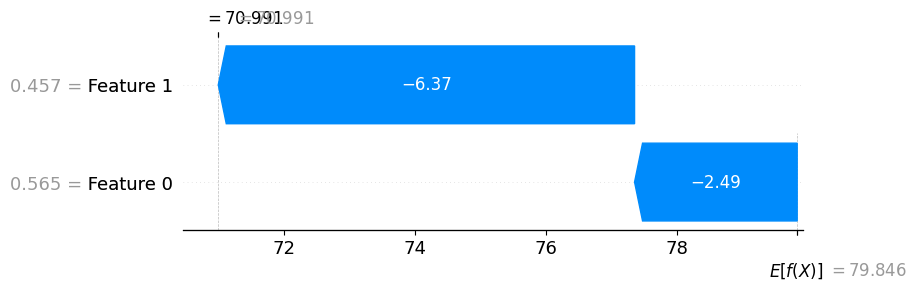

In [145]:
# waterfall plot for observations
shap.plots.waterfall(shap_values[0])

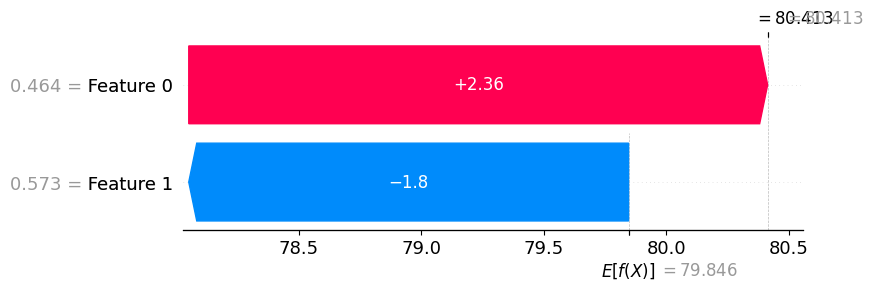

In [146]:
# waterfall plot for observations
# shap.plots.waterfall(shap_values[1], max_display=4)
shap.plots.waterfall(shap_values[1])

In [138]:
shap.initjs()

In [139]:
shap.plots.force(shap_values[0])

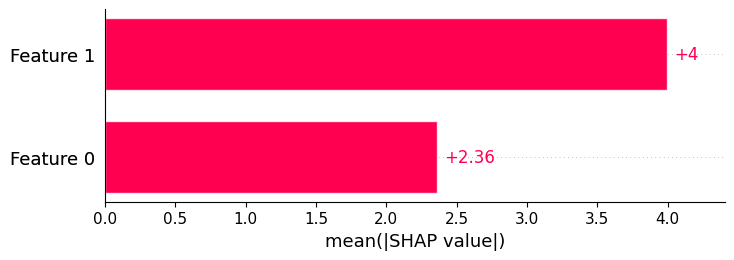

In [ ]:
shap.plots.bar(shap_values) # calculate mean absolute shap values

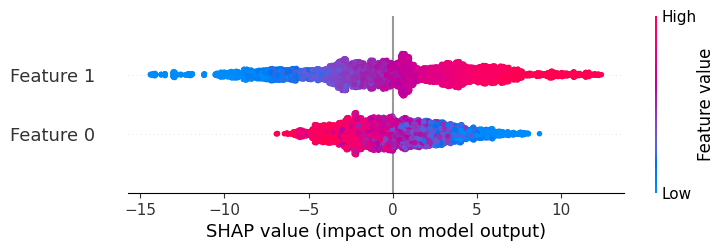

In [141]:
shap.plots.beeswarm(shap_values) #Beeswarm plot

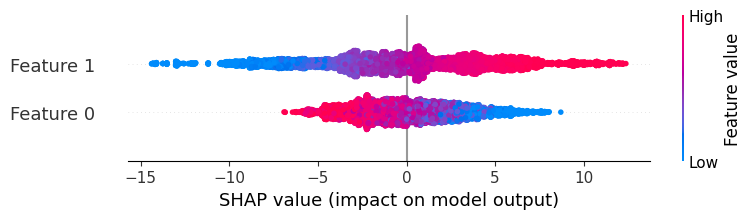

In [143]:
shap.summary_plot(shap_values, X_test)

#### Forcasting using XGBOOST

In [148]:
df_date_clean.columns

Index(['Date-Time (CDT)', 'temperature', 'humidity', 'dew_point', 'month',
       'day', 'year'],
      dtype='object')

In [151]:
forcast_df = df_date_clean.copy()
forcast_df.columns

Index(['Date-Time (CDT)', 'temperature', 'humidity', 'dew_point', 'month',
       'day', 'year'],
      dtype='object')

In [153]:
forcast_df['hour'] = forcast_df['Date-Time (CDT)'].dt.hour
forcast_df.head()

,Date-Time (CDT),temperature,humidity,dew_point,month,day,year,hour
0,2023-05-03 14:51:44,75.78,22.96,35.34,May,Wednesday,2023,14
1,2023-05-03 14:56:44,74.03,24.02,35.01,May,Wednesday,2023,14
2,2023-05-03 15:01:44,72.86,24.31,34.32,May,Wednesday,2023,15
3,2023-05-03 15:06:44,72.23,24.91,34.40,May,Wednesday,2023,15
4,2023-05-03 15:11:44,71.80,25.18,34.30,May,Wednesday,2023,15


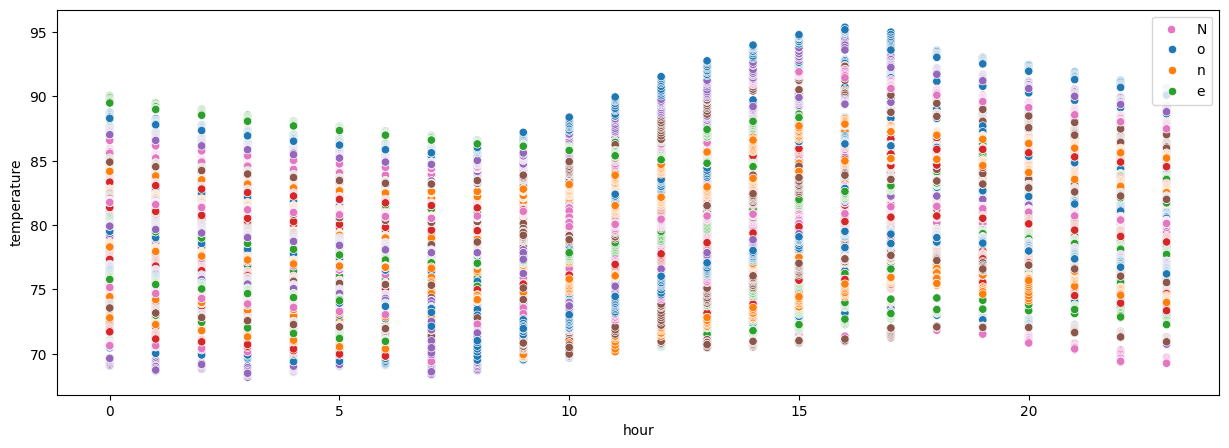

In [162]:
plt.figure(figsize=(15,5))
# plt.scatter(forcast_df['hour'],forcast_df['temperature'])
sns.scatterplot(data=forcast_df, x='hour', y= 'temperature', hue='day')
plt.legend('None')
plt.show()

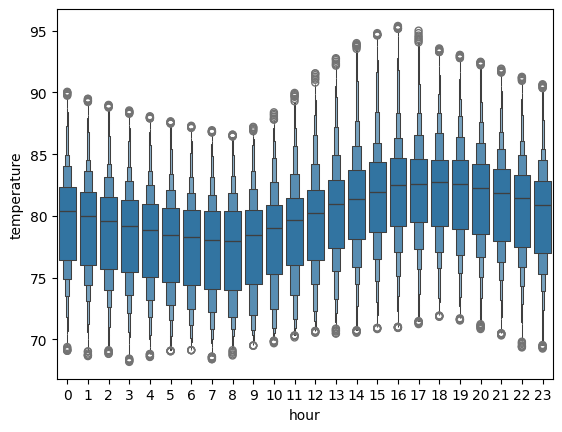

In [ ]:
#box plot 
plt.figure(figsize=(15,5))
sns.boxenplot(data=forcast_df, x= 'hour', y='temperature')
plt.show()

In [164]:
forcast_df.columns

Index(['Date-Time (CDT)', 'temperature', 'humidity', 'dew_point', 'month',
       'day', 'year', 'hour'],
      dtype='object')

In [180]:
dfcast = forcast_df[['Date-Time (CDT)', 'temperature']]

In [181]:
dfcast.head()

,Date-Time (CDT),temperature
0,2023-05-03 14:51:44,75.78
1,2023-05-03 14:56:44,74.03
2,2023-05-03 15:01:44,72.86
3,2023-05-03 15:06:44,72.23
4,2023-05-03 15:11:44,71.80


In [182]:
dfcast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39058 entries, 0 to 39061
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date-Time (CDT)  39058 non-null  datetime64[ns]
 1   temperature      39058 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [183]:
dfcast.describe()

,Date-Time (CDT),temperature
count,39058,39058.000000
mean,2023-07-10 10:14:14,79.833534
min,2023-05-03 14:51:44,68.180000
25%,2023-06-06 12:32:59,76.860000
50%,2023-07-10 10:14:14,80.280000
75%,2023-08-13 07:55:29,82.760000
max,2023-09-16 05:36:44,95.380000
std,NaN,4.446776


In [184]:
dfcast.columns

Index(['Date-Time (CDT)', 'temperature'], dtype='object')

In [190]:
df_cast = dfcast.rename(columns={'Date-Time (CDT)': 'date_time'})
# df_cast
df_cast = df_cast.set_index('date_time') # set date column as the index of the dataset
df_cast

,temperature
date_time,
2023-05-03 14:51:44,75.78
2023-05-03 14:56:44,74.03
2023-05-03 15:01:44,72.86
2023-05-03 15:06:44,72.23
2023-05-03 15:11:44,71.80
...,...
2023-09-16 05:16:44,74.25
2023-09-16 05:21:44,74.21
2023-09-16 05:26:44,74.21


In [193]:
df_cast.columns

Index(['temperature'], dtype='object')

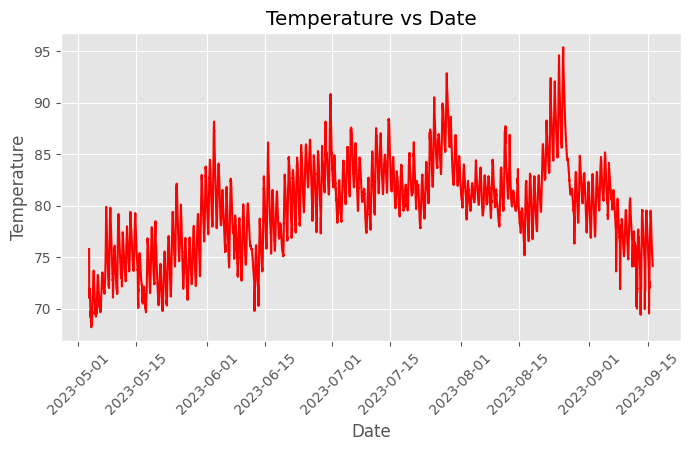

In [202]:
# df_cast.plot()
plt.figure(figsize=(8,4))
with plt.style.context('ggplot'):
    plt.plot(df_cast['temperature'], color='red')
    plt.title('Temperature vs Date')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# df_cast.index

DatetimeIndex(['2023-05-03 14:51:44', '2023-05-03 14:56:44',
               '2023-05-03 15:01:44', '2023-05-03 15:06:44',
               '2023-05-03 15:11:44', '2023-05-03 15:16:44',
               '2023-05-03 15:21:44', '2023-05-03 15:26:44',
               '2023-05-03 15:31:44', '2023-05-03 15:36:44',
               ...
               '2023-09-16 04:51:44', '2023-09-16 04:56:44',
               '2023-09-16 05:01:44', '2023-09-16 05:06:44',
               '2023-09-16 05:11:44', '2023-09-16 05:16:44',
               '2023-09-16 05:21:44', '2023-09-16 05:26:44',
               '2023-09-16 05:31:44', '2023-09-16 05:36:44'],
              dtype='datetime64[ns]', name='date_time', length=39058, freq=None)

In [210]:
# Train test split of data
# from sklearn.model_selection import train_test_split

# X_train, y_train, X_test, y_test = train_test_split(df_cast, test_size=0.2, random_state=42)

# split ratio (80 train, 20 test)
split_ratio = 0.8
split_index = int(len(df_cast)*split_ratio)
print(split_index)

# split into train and test sets
X_train = df_cast.iloc[:split_index]
X_test = df_cast.iloc[split_index:]

31246


In [213]:
X_train

,temperature
date_time,
2023-05-03 14:51:44,75.78
2023-05-03 14:56:44,74.03
2023-05-03 15:01:44,72.86
2023-05-03 15:06:44,72.23
2023-05-03 15:11:44,71.80
...,...
2023-08-20 02:16:44,80.67
2023-08-20 02:21:44,80.67
2023-08-20 02:26:44,80.62


In [209]:
round(df_cast.shape[0]*0.8)

31246

In [ ]:
# df_cast.shape

(39058, 1)

In [ ]:
# xa = [5,22,45,6,9]
# print(xa[:4])
# print(xa[1])


[5, 22, 45, 6]
22


In [ ]:
# df_cast.columns

Index(['temperature'], dtype='object')

In [ ]:
# xx = df_cast.loc[:,'temperature']
# xx

date_time
2023-05-03 14:51:44    75.78
2023-05-03 14:56:44    74.03
2023-05-03 15:01:44    72.86
2023-05-03 15:06:44    72.23
2023-05-03 15:11:44    71.80
                       ...  
2023-09-16 05:16:44    74.25
2023-09-16 05:21:44    74.21
2023-09-16 05:26:44    74.21
2023-09-16 05:31:44    74.21
2023-09-16 05:36:44    74.12
Name: temperature, Length: 39058, dtype: float64

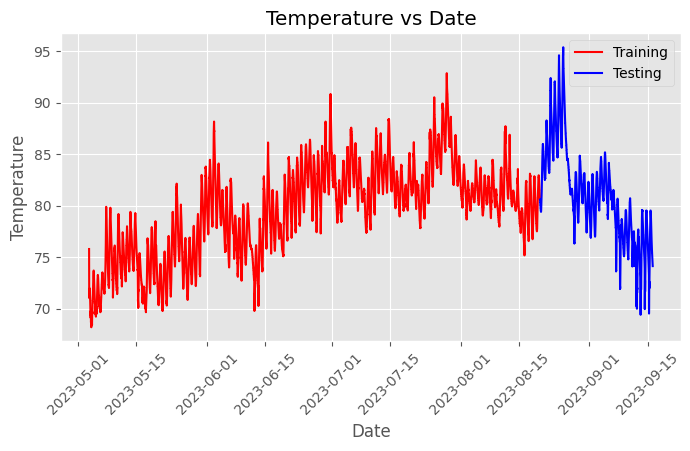

In [230]:
# df_cast.plot()
plt.figure(figsize=(8,4))
with plt.style.context('ggplot'):
    plt.plot(X_train, color='red', label='training')
    plt.plot(X_test, color='blue', label='testing')
    plt.title('Temperature vs Date')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.legend(['Training','Testing'])
    plt.show()

In [240]:
dax = df_cast.loc[(df_cast.index > '2023-05-01')&(df_cast.index < '2023-05-08')]
dax

,temperature
date_time,
2023-05-03 14:51:44,75.78
2023-05-03 14:56:44,74.03
2023-05-03 15:01:44,72.86
2023-05-03 15:06:44,72.23
2023-05-03 15:11:44,71.80
...,...
2023-05-07 23:36:44,76.03
2023-05-07 23:41:44,75.99
2023-05-07 23:46:44,75.94


<Axes: xlabel='date_time'>

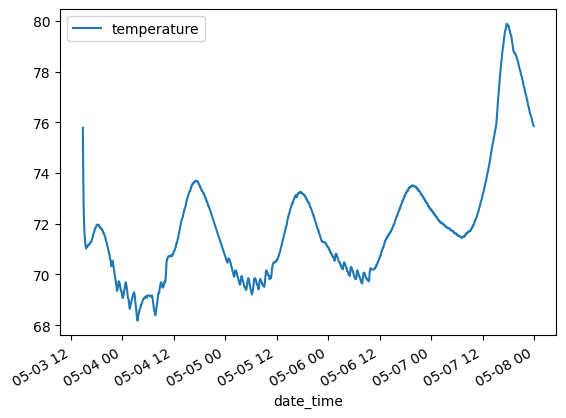

In [241]:
df_cast.loc[(df_cast.index > '2023-05-01')&(df_cast.index < '2023-05-08')].plot()

In [244]:
def create_features(dataframe):
    df = dataframe.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    
    return df

In [246]:
dfnew = create_features(df_cast)
dfnew

,temperature,hour,dayofweek,quarter,month,year,dayofyear
date_time,,,,,,,
2023-05-03 14:51:44,75.78,14,2,2,5,2023,123
2023-05-03 14:56:44,74.03,14,2,2,5,2023,123
2023-05-03 15:01:44,72.86,15,2,2,5,2023,123
2023-05-03 15:06:44,72.23,15,2,2,5,2023,123
2023-05-03 15:11:44,71.80,15,2,2,5,2023,123
...,...,...,...,...,...,...,...
2023-09-16 05:16:44,74.25,5,5,3,9,2023,259
2023-09-16 05:21:44,74.21,5,5,3,9,2023,259
2023-09-16 05:26:44,74.21,5,5,3,9,2023,259


In [247]:
train = create_features(X_train)
test = create_features(X_test)

In [249]:
dfnew.columns

Index(['temperature', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [250]:
features = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
target = 'temperature'

In [251]:
# define x and y train and test variables
Xx_train= train[features]
yy_train = train[target]

Xx_test= test[features]
yy_test = test[target]

In [261]:
# setup xgboost for modelling
reg = XGBRegressor(objective='reg:squarederror',
                   n_estimators=1000, 
                   learning_rate=0.01,
                   early_stopping = 50)
reg.fit(Xx_train, yy_train, 
        eval_set = [(Xx_train, yy_train),(Xx_test,yy_test)],verbose=1)

[0]	validation_0-rmse:4.32731	validation_1-rmse:4.79211
[1]	validation_0-rmse:4.28872	validation_1-rmse:4.78493
[2]	validation_0-rmse:4.25056	validation_1-rmse:4.77798
[3]	validation_0-rmse:4.21283	validation_1-rmse:4.77100
[4]	validation_0-rmse:4.17552	validation_1-rmse:4.76416
[5]	validation_0-rmse:4.13861	validation_1-rmse:4.75787
[6]	validation_0-rmse:4.10273	validation_1-rmse:4.75172
[7]	validation_0-rmse:4.06662	validation_1-rmse:4.74566
[8]	validation_0-rmse:4.03153	validation_1-rmse:4.73996
[9]	validation_0-rmse:3.99623	validation_1-rmse:4.73372
[10]	validation_0-rmse:3.96180	validation_1-rmse:4.72824
[11]	validation_0-rmse:3.92726	validation_1-rmse:4.72224
[12]	validation_0-rmse:3.89359	validation_1-rmse:4.71696
[13]	validation_0-rmse:3.85978	validation_1-rmse:4.71156
[14]	validation_0-rmse:3.82696	validation_1-rmse:4.70650
[15]	validation_0-rmse:3.79389	validation_1-rmse:4.70093
[16]	validation_0-rmse:3.76168	validation_1-rmse:4.69606
[17]	validation_0-rmse:3.72941	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [262]:
# feature importances
reg.feature_importances_

# create dataframe from feature importances
feature_importance = pd.DataFrame(data=reg.feature_importances_,
                                  index=reg.feature_names_in_,
                                  columns=['importances'])
feature_importance

,importances
hour,0.099144
dayofweek,0.038970
quarter,0.092168
month,0.328634
year,0.000000
dayofyear,0.441084


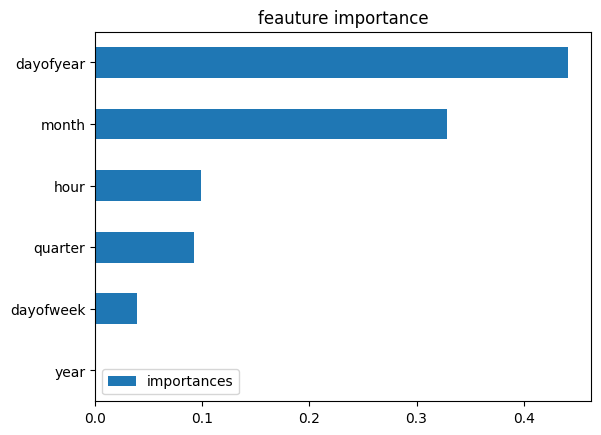

In [267]:
feature_importance.sort_values('importances').plot(kind='barh', title='feauture importance')
plt.show()

In [275]:
test['prediction'] = reg.predict(Xx_test)   
test

,temperature,hour,dayofweek,quarter,month,year,dayofyear,prediction
date_time,,,,,,,,
2023-08-20 02:41:44,80.58,2,6,3,8,2023,232,80.471184
2023-08-20 02:46:44,80.53,2,6,3,8,2023,232,80.471184
2023-08-20 02:51:44,80.53,2,6,3,8,2023,232,80.471184
2023-08-20 02:56:44,80.53,2,6,3,8,2023,232,80.471184
2023-08-20 03:01:44,80.49,3,6,3,8,2023,232,79.639229
...,...,...,...,...,...,...,...,...
2023-09-16 05:16:44,74.25,5,5,3,9,2023,259,78.120308
2023-09-16 05:21:44,74.21,5,5,3,9,2023,259,78.120308
2023-09-16 05:26:44,74.21,5,5,3,9,2023,259,78.120308


In [277]:
dfnew

,temperature,hour,dayofweek,quarter,month,year,dayofyear
date_time,,,,,,,
2023-05-03 14:51:44,75.78,14,2,2,5,2023,123
2023-05-03 14:56:44,74.03,14,2,2,5,2023,123
2023-05-03 15:01:44,72.86,15,2,2,5,2023,123
2023-05-03 15:06:44,72.23,15,2,2,5,2023,123
2023-05-03 15:11:44,71.80,15,2,2,5,2023,123
...,...,...,...,...,...,...,...
2023-09-16 05:16:44,74.25,5,5,3,9,2023,259
2023-09-16 05:21:44,74.21,5,5,3,9,2023,259
2023-09-16 05:26:44,74.21,5,5,3,9,2023,259


In [ ]:
test[['prediction']]
test['prediction']

,prediction
date_time,
2023-08-20 02:41:44,80.471184
2023-08-20 02:46:44,80.471184
2023-08-20 02:51:44,80.471184
2023-08-20 02:56:44,80.471184
2023-08-20 03:01:44,79.639229
...,...
2023-09-16 05:16:44,78.120308
2023-09-16 05:21:44,78.120308
2023-09-16 05:26:44,78.120308


In [281]:
dfnew = dfnew.merge(test[['prediction']], how='left', left_index=True, right_index=True)
dfnew

,temperature,hour,dayofweek,quarter,month,year,dayofyear,prediction_x,prediction_y
date_time,,,,,,,,,
2023-05-03 14:51:44,75.78,14,2,2,5,2023,123,NaN,NaN
2023-05-03 14:56:44,74.03,14,2,2,5,2023,123,NaN,NaN
2023-05-03 15:01:44,72.86,15,2,2,5,2023,123,NaN,NaN
2023-05-03 15:06:44,72.23,15,2,2,5,2023,123,NaN,NaN
2023-05-03 15:11:44,71.80,15,2,2,5,2023,123,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-16 05:16:44,74.25,5,5,3,9,2023,259,78.120308,78.120308
2023-09-16 05:21:44,74.21,5,5,3,9,2023,259,78.120308,78.120308
2023-09-16 05:26:44,74.21,5,5,3,9,2023,259,78.120308,78.120308


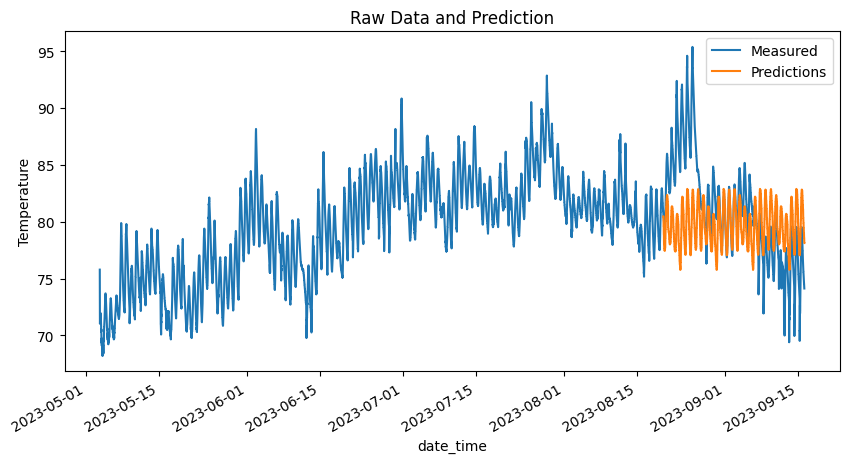

In [286]:
ax = dfnew[['temperature']].plot(figsize=(10,5))
dfnew['prediction_x'].plot(ax=ax)
plt.legend(['Measured','Predictions'])
ax.set_title('Raw Data and Prediction')
ax.set_ylabel('Temperature')
plt.show()

#### A/B Testing power analysis


In [287]:
# Sample Size for A/B testing
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# parameters
baseline = 0.10 # 10% conversion rate
mde = 0.02 # 2% uplift
alpha = 0.05 # significant level
power = 0.8 # power

# effective size
effect_size = proportion_effectsize(baseline, baseline + mde)

# calculate sample size per group
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# print results
print(f'Required sample size per group: {round(sample_size)}')

Required sample size per group: 3835
